# General Data Visualization with Python

## Visualization with Seaborn

Data Visualization is the art of representing data in the form of graphs. It is a useful tool for professionals who work with data, i.e., financial analysts, business analysts, data analysts, data scientists, to name a few examples.

Matplotlib has been at the core of scientific visualization in Python for decades, but even avid users will admit it often leaves much to be desired.
There are several complaints about Matplotlib that often come up:

- A common early complaint, which is now outdated: prior to version 2.0, Matplotlib's color and style defaults were at times poor and looked dated.
- Matplotlib's API is relatively low-level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas `DataFrame` objects. In order to visualize data from a `DataFrame`, you must extract each `Series` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the `DataFrame` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas.

By convention, Seaborn is often imported as `sns`:

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


Seaborn has 18 in-built datasets, that can be found using the following command: `sns.get_dataset_names()`



We will be using the Titanic dataset for this demontration.

In [5]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Different types of graphs

### Count plot
A count plot is helpful when dealing with categorical values. It is used to plot the frequency of the different categories. The column sex contains categorical data in the titanic data, i.e., male and female.

In [6]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (5, 2.5)})
#overall setup for lager plots

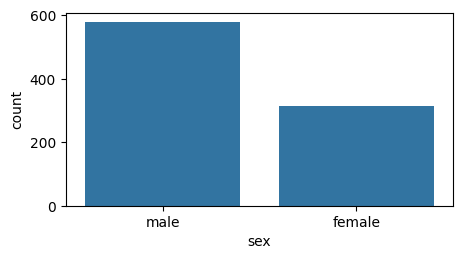

In [7]:
sns.countplot(x = 'sex', data=titanic);

We can observe from the graph that the number of male passengers is significantly higher than the number of female passengers.

We can further break up the bars in the count plot based on another categorical variable. The color palette of the plot can also be customized.

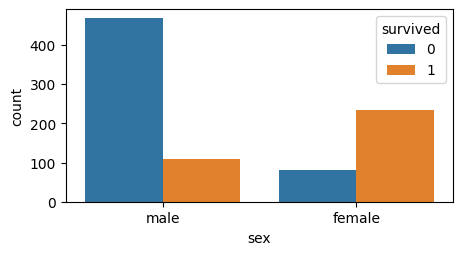

In [8]:
sns.countplot(x = 'sex', hue = 'survived', data = titanic);

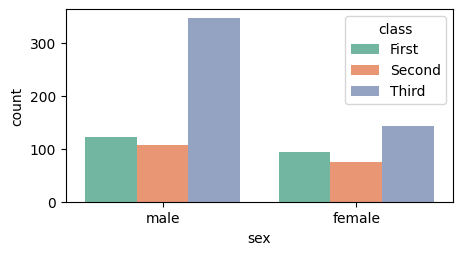

In [9]:
sns.countplot(x = 'sex', hue='class', data = titanic, palette = 'Set2');

### KDE Plot
A Kernel Density Estimate (KDE) Plot is used to plot the distribution of continuous data.



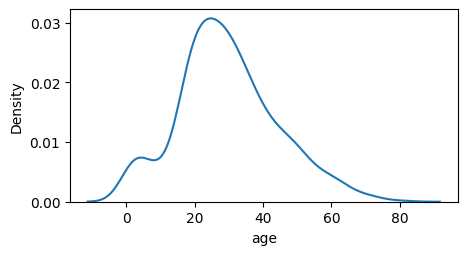

In [12]:
sns.kdeplot(x = 'age', data = titanic);

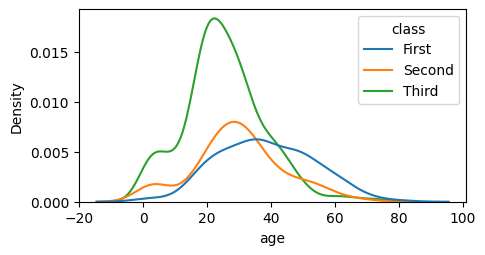

In [14]:
sns.kdeplot(x = 'age', hue = 'class', data = titanic);

The peak of the above graph is in between 20 and 40 so we can conclude that most passengers were between the ages of 20 and 40.

### Distribution plot
A Distribution plot is similar to a KDE plot. It is used to plot the distribution of continuous data.



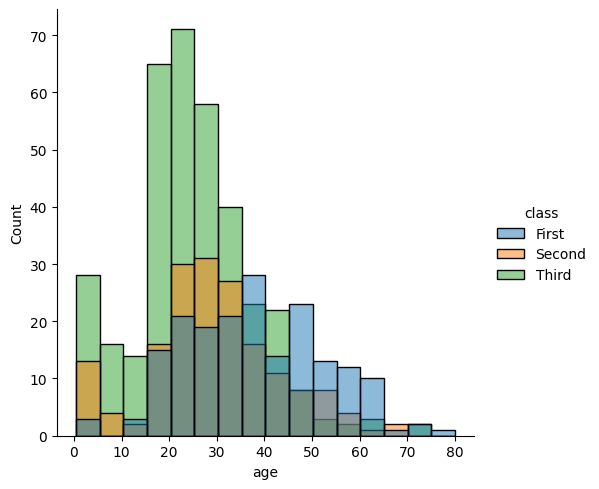

In [15]:
sns.displot(x = 'age', hue = 'class', bins = 16 , data = titanic);

The plot above tells us that most people onboard the titanic were in their mid-twenties.



### Scatter plot
For this plot and the plots below, we will be working with the iris dataset. The iris dataset contains data related to flower's petal size (petal length and petal width) and sepal size (sepal length and sepal width).

These features are used to classify the type of iris (Setosa, Versicolour, and Virginica). Below we will try to investigate the relation between the features.

First, we will need to load the iris dataset.



In [16]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica



Scatter plots help understand co-relation between data,



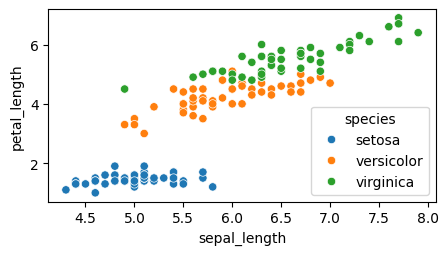

In [20]:
sns.scatterplot(x='sepal_length', y ='petal_length' ,
data = iris, hue = 'species');

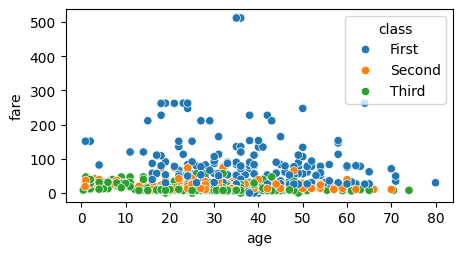

In [22]:
sns.scatterplot(x='age', y ='fare', data = titanic , hue = 'class');

A scatterplot requires data for its x-axis and y-axis. We can also pass a value for the hue parameter to color the dots based on a categorical column.

In the plot above we can observe that an iris flower with a sepal length < 6cm and petal length > 2cm is most likely of type setosa. Although there is no distinct boundary present between the versicolor dots and virginica dots, an iris flower with petal length between 2cm and 5cm is most likely of type versicolor, while iris flowers with petal length > 5cm are most likely of type virginica.

## Facetting

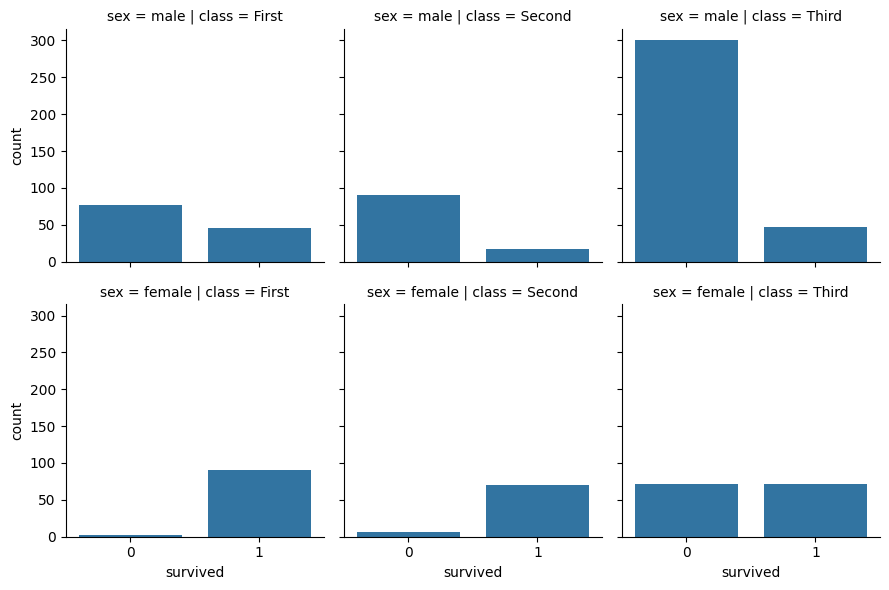

In [24]:
g = sns.FacetGrid(titanic, col="class",  row="sex")
g.map_dataframe(sns.countplot, x = 'survived');

### Joint plot
A Joint Plot is also used to plot the correlation between data.

The argument `kind`: The kind of plot to be plotted. It can be one of the following.
'scatter', 'hist', 'hex', 'kde', 'reg', 'resid'




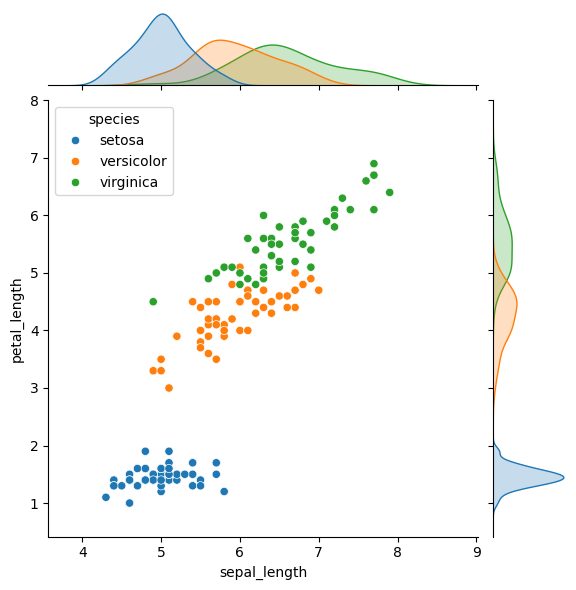

In [25]:
sns.jointplot(x='sepal_length' , y ='petal_length',
data = iris ,  hue = "species");

### Pair plots
Seaborn lets us plot multiple scatter plots. It's a good option when you want to get a quick overview of your data.

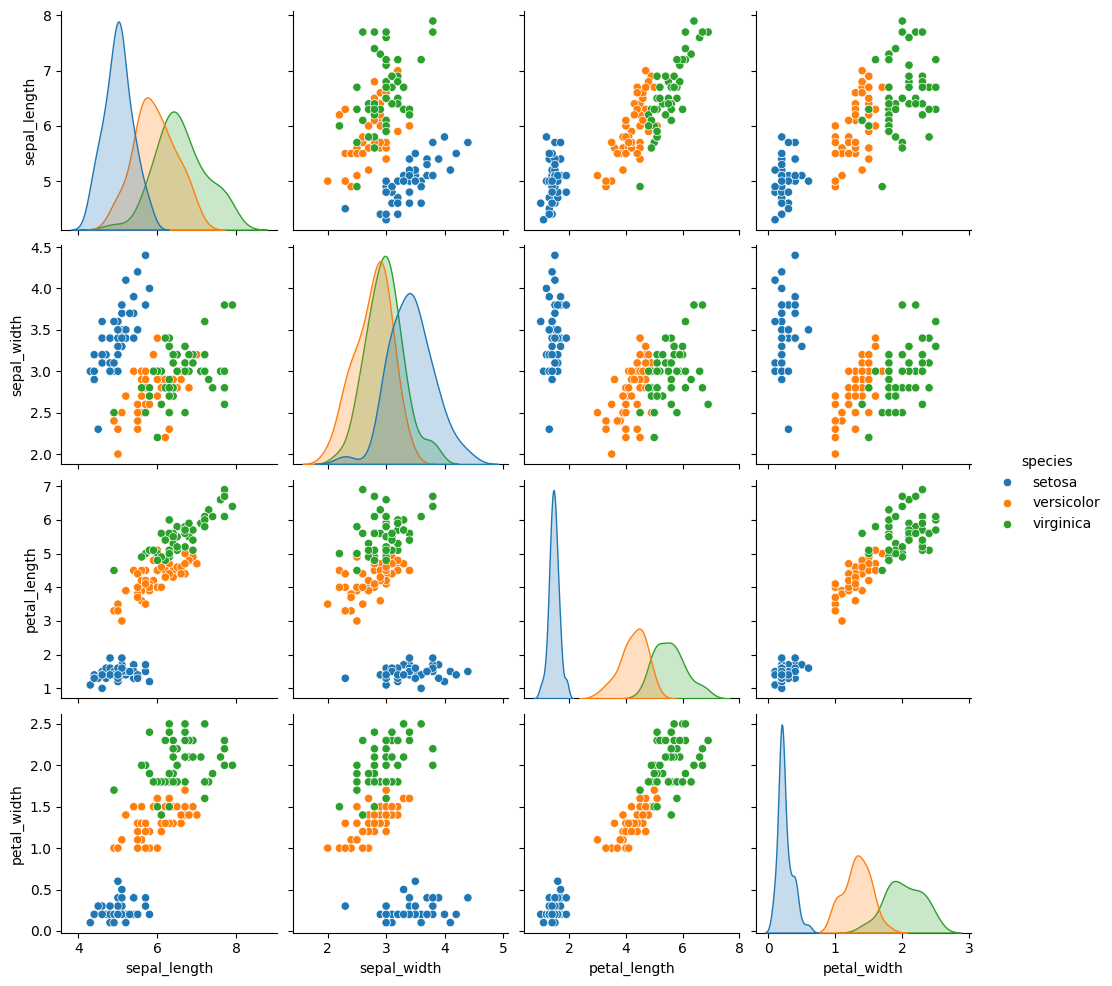

In [26]:
sns.pairplot(iris, hue="species");

It pairs all the continuous data and plots their correlation. It also plots the distribution of the data.

If you do not wish to pair all the columns, you can pass in two more parameters x_vars and y_vars.

### Heatmaps
A heat map can be used to visualize confusion, matrices, and correlation.



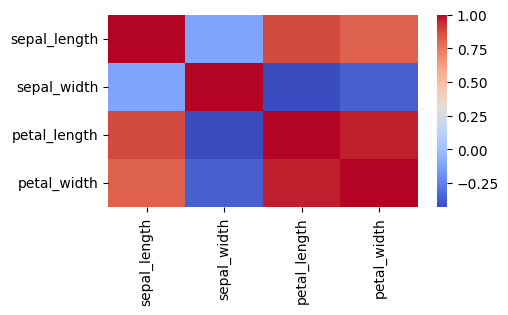

In [30]:
corr = iris.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm");

## Visualization with `Lets-Plot`

`Lets-Plot` is a versatile plotting library designed to create high-quality, interactive visualizations. Originally developed by JetBrains, it integrates seamlessly with both Python and Kotlin, providing a unified API for data visualization:

https://lets-plot.org/

### Grammar of Graphics
The Lets-Plot library is built around the concept of the Grammar of Graphics, a systematic way to describe and construct statistical graphics. The Grammar of Graphics allows users to create complex visualizations by combining independent components in a coherent manner. Here are the main components:

* Data: The dataset being visualized.
* Aesthetics (aes): Mappings from data variables to visual properties like position, color, size, and shape.
* Geometries (geom): Geometric objects like points, lines, bars, etc., that represent the data.
* Statistics (stat): Statistical transformations like binning, smoothing, or summarizing data.
* Scales: Define how data values are mapped to aesthetic values.
* Coordinates (coord): Coordinate systems like Cartesian or polar coordinates.
* Facets: Dividing data into subplots based on one or more variables.

By combining these components, users can create a wide variety of plots, from simple scatter plots to complex multi-panel visualizations.

`Lets-Plot` follows ggplot2 orientation, a popular plotting system in the R programming language, which also adheres to the Grammar of Graphics principles. The core idea is to build plots incrementally by adding layers, each contributing a different aspect to the visualization. This layer-based approach makes it easy to create and customize plots in a structured manner.

### Building a Plot in the ggplot2 manner
* Initialize: Define the dataset and map variables to aesthetics (e.g., x and y axes).
* Layer: Add geometries to represent the data (e.g., scatter plot, line plot).
* Customize: Modify the appearance with titles, labels, themes, and scales.
* Export: Save or display the plot as needed.


## ggplot examples from lecture

In [31]:
from lets_plot import *

mpg = pd.read_csv("https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv")
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [32]:
LetsPlot.setup_html()
ggplot(mpg, aes(x='displ', y='cty')) + geom_point()

In [37]:
ggplot(mpg, aes(x='displ',y='cty',color='class')) + geom_point(size=5) +\
ylab("mpg (City)") + xlab("Displacement") +\
labs(title = "Fuel Efficiency",
		   subtitle = "(urban driving)",
		   caption = "Source: ggplot::mpg")

In [41]:
ggplot(mpg, aes(x='cty'))+ geom_histogram(fill="white",color="black",bins=15)

In [48]:
ggplot(mpg, aes(x='class', y='cty')) + geom_jitter()  + geom_boxplot(alpha=0.5) + geom_violin(alpha=0.5) 

In [ ]:
data = pd.DataFrame(mpg.groupby('class')['cty'].mean()).reset_index()
ggplot(data,aes(y='cty',x='class')) + geom_point()

In [ ]:
ggplot(mpg, aes(fill='class')) + geom_bar(position = "fill") + scale_fill_brewer(palette="Paired") 


## Seaborn examples with ggplot

In [49]:


# Assuming `df` is your DataFrame
ggplot(titanic) + geom_bar(aes(x='sex'))

In [1]:
ggplot(titanic) + geom_bar(aes(x='sex', fill='class'), position = 'dodge')

NameError: name 'ggplot' is not defined

In [52]:
ggplot(titanic) + geom_bar(aes(x='survived'), position = 'dodge') + facet_grid('class','sex')

In [ ]:
from lets_plot.mapping import as_discrete
ggplot(titanic) + geom_bar(aes(x='class',fill=as_discrete('survived'))) + facet_grid('sex')

In [ ]:
ggplot(titanic) + geom_density(aes(x='age', color='class'))

In [53]:
ggplot(titanic,aes(x='age', color='class', fill = 'class')) + geom_histogram(alpha = 0.2)

In [56]:
ggplot(titanic,aes(x='age')) + geom_density() + geom_histogram() + facet_wrap('class', nrow=1)